In [1]:
### IMPORT LIBRARIES ###
import os
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np

os.chdir('../')
from module import libgen, libnc4
os.chdir('./driver')

In [2]:
### GET A FILEPATH FOR A NETCDF FILE ###
file_path = '../data/cld30.nc4'

### OPEN THE NETCDF FILE ###
dataset = nc.Dataset(file_path, 'r')

### PRINT THE FILE AND VARIABLE INFORMATION ###
print("file information:")
print(dataset)
print("\nVariables:")
for variable in dataset.variables:
    print(variable)

file information:
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dx: 70.0
    dy: 70.0
    dimensions(sizes): XDIM(400), YDIM(400), ZDIM(130)
    variables(dimensions): float32 DZ(ZDIM), float32 ZC(ZDIM), float32 XYZ_NDC(ZDIM, YDIM, XDIM), float32 XYZ_LWC(ZDIM, YDIM, XDIM)
    groups: 

Variables:
DZ
ZC
XYZ_NDC
XYZ_LWC


In [11]:
### GET A VARIABLE FROM THE NETCDF FILE ###
# var_name = 'XYZ_NDC'
# var_name = 'XYZ_LWC'
# var_name = 'DZ'
var_name = 'ZC'
data = dataset.variables[var_name][:]

### PRINT THE VARIABLE DATA ###
print(f"{var_name}:")
print(data)

### SHOW TEH SHAPE OF THE VARIABLE DATA ###
print(f"\nShape of the data: {data.shape}")

ZC:
[   5.       15.       25.       35.       45.       55.       65.
   75.       85.       95.      105.      115.      125.      135.
  145.      155.      165.      175.      185.      195.      205.
  215.      225.      235.      245.      255.      265.      275.
  285.      295.      305.      315.      325.      335.      345.
  355.      365.      375.      385.      395.      405.      415.
  425.      435.      445.      455.      465.      475.      485.
  495.      505.      515.      525.      535.      545.      555.
  565.      575.      585.      595.      605.      615.      625.
  635.      645.      655.      665.      675.      685.      695.
  705.      715.      725.      735.      745.      755.      765.
  775.      785.      795.      805.      815.      825.      835.
  845.      855.      865.      875.      885.      895.      905.
  915.      925.      935.      945.      955.      965.      975.
  985.      995.     1005.     1015.     1025.     1035.  

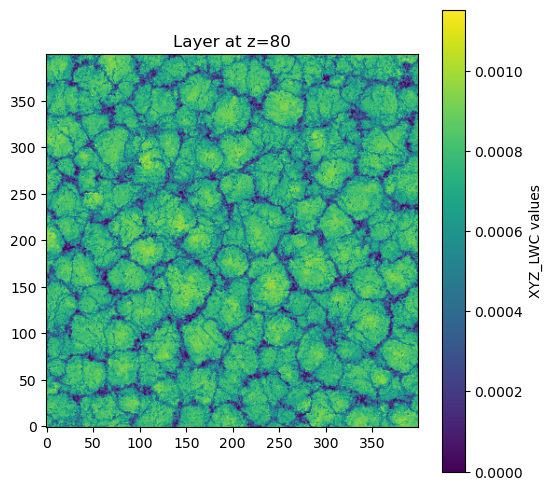

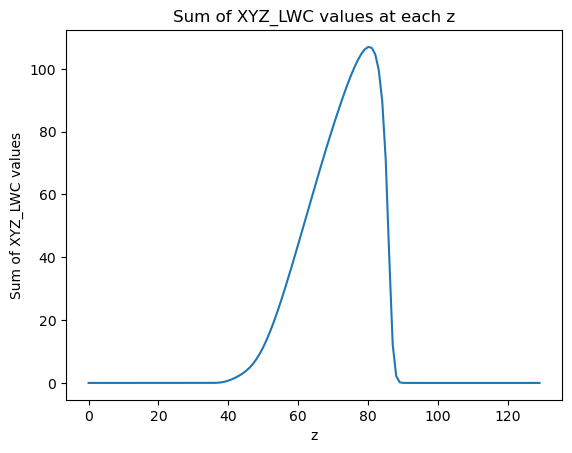

In [4]:
### PLOT A SLICE OF THE DATA ###
libnc4.plot_slice_at_z(dataset, 'XYZ_LWC', 80)
libnc4.plot_sum(dataset, 'XYZ_LWC')

# libnc4.plot_slice_at_z(dataset, 'XYZ_NDC', 80)
# libnc4.plot_sum(dataset, 'XYZ_NDC')

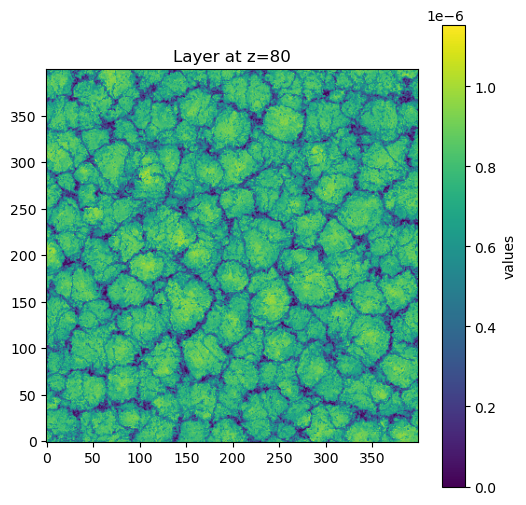

In [5]:
### SET CONSTANTS ###
density_water = 1000.0 # Assumed density of water in kg/m^3

### CALUCLATE VOLUME CONCENTRATION FROM LWC ###
lwc = dataset.variables['XYZ_LWC'][:]
volume_concentration = lwc / density_water

### PLOT THE VOLUME CONCENTRATION ###
volume_concentration[80,:,:]

libnc4.plot_slice_at_z_simple(volume_concentration, 80)

In [ ]:
### SAVE THE TEXT TO FILES ###
for i in range(lwc.shape[0]):
    slice_data = volume_concentration[i, :, :]
    text = libgen.array_to_input(slice_data)
    file_path = f'../data/volume_concentration_{i}.txt'
    with open(file_path, 'w') as file:
        file.write(text)

In [13]:
libgen.write_combined_text_files('../data/volume_concentration_input.txt',imax=99)

In [12]:
### CLOSE THE NETCDF FILE ###
dataset.close()